In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# 1. Adathalmaz előkészítése

Olvasd be a movies_prep és a ratings_sample csv fájlokat. Előbbi az egyes filmek kategóriáját tartalmazza, utóbbi pedig a filmekre vonatkozó felhasználói értékeléseket.

Normalizáld a felhasználók egyes értékeléseit az adott felhasználó átlagos értékelésével (adott felhasználó minden értékeléséből kivonod, hogy az összes általa értékelt filmen mi volt az átlagos értékelése) - megszokott értékelési tendenciájához képest jobban / kevésbé kedveli.

A filmkategóriáknál (genre_) a 0 értékeket helyettesítsd nan értékkel majd szorozd rá az adott film normalizált értékelését (rating). Ezután állítsd elő, hogy az egyes felhasználók az egyes kategóriákat átlagosan mennyire szeretik, hogy a klaszterező algoritmus számára megfelelő formába kerüljön.

In [2]:
movies_prep_path=r"C:\5. felev\DataScience\2.hazi\movies_prep.csv"
ratings_sample_path=r"C:\5. felev\DataScience\2.hazi\ratings_sample.csv"
movies_df=pd.read_csv (movies_prep_path)
ratings_df=pd.read_csv(ratings_sample_path)

ratings_df['user_avg']=ratings_df.groupby('userId')['rating'].transform('mean')
ratings_df['ratings_normalized']=ratings_df['rating']-ratings_df['user_avg']
ratings_df
 

genre_coloumns = [col for col in movies_df.columns if col.startswith('genre_')]
movies_df[genre_coloumns]=movies_df[genre_coloumns].replace(0, np.nan)
 

merged_df=pd.merge(ratings_df[['movieId', 'userId','ratings_normalized']],movies_df,on='movieId',how='left')
genre_cols = [col for col in merged_df.columns if col.startswith('genre_')]
for col in genre_cols:
    merged_df[col] = merged_df[col] * merged_df['ratings_normalized']
 

user_genre_pref = merged_df.groupby('userId')[genre_cols].mean()
user_genre_pref = user_genre_pref.round(2)
user_genre_pref


,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy,genre_Romance,genre_Drama,genre_Action,genre_Crime,genre_Thriller,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_IMAX,genre_Documentary,genre_War,genre_Musical,genre_Western,genre_Film-Noir
userId,,,,,,,,,,,,,,,,,,,
1,0.22,NaN,NaN,0.72,0.22,1.22,0.01,NaN,-0.28,-0.28,NaN,NaN,NaN,NaN,NaN,-0.03,NaN,NaN,-0.28
2,0.39,0.68,0.93,-0.69,0.18,-1.57,0.12,-0.26,0.68,0.48,0.18,0.43,0.68,0.68,NaN,1.18,0.68,NaN,NaN
3,0.07,0.21,-0.04,-0.20,-0.04,-0.29,0.21,-0.17,0.33,-0.05,-0.54,0.52,-0.17,-0.23,NaN,-0.09,NaN,NaN,1.21
4,-0.34,0.45,0.51,0.53,-1.00,0.26,0.70,-0.18,0.60,-0.15,NaN,0.10,-0.90,-1.20,NaN,0.10,0.35,0.10,NaN
5,-0.13,0.27,0.27,-0.30,-0.40,-0.53,0.27,-0.40,NaN,-0.40,0.27,1.27,0.27,0.27,NaN,NaN,0.27,-0.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,-0.50,NaN,1.00,0.00,0.00,-0.20,0.00,-0.50,NaN,1.00,0.00,1.00,-1.00,NaN,NaN,NaN,NaN,NaN,NaN
162538,-1.15,NaN,NaN,-0.01,-0.15,-0.40,0.45,0.25,1.01,0.10,NaN,0.85,-0.32,-0.15,NaN,0.35,NaN,NaN,NaN
162539,0.00,0.67,0.67,0.00,0.67,NaN,0.67,-0.67,0.67,0.33,NaN,0.67,-0.33,NaN,NaN,-0.33,NaN,NaN,NaN


# 2. K-Means klaszterezés

Keresd meg hány klasztert kellene létrehozni a K-Means algoritmussal a felhasználókból (random_state = 42 értékkel). Ezután végezd el a klaszterezést és vond le a következtetést, hogy melyik klaszternek melyik a 3 legjobban és 3 legkevésbé kedvelt filmkategóriája.

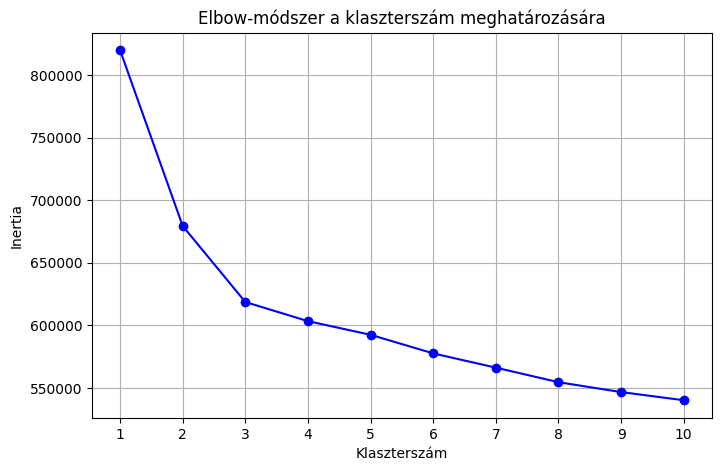

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = user_genre_pref.fillna(0)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Klaszterszám')
plt.ylabel('Inertia')
plt.title('Elbow-módszer a klaszterszám meghatározására')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
user_genre_pref['cluster'] = kmeans.fit_predict(X)

cluster_analysis = {}
genre_columns = [col for col in user_genre_pref.columns if col.startswith('genre_')]

for cluster in range(optimal_k):
    cluster_data = user_genre_pref[user_genre_pref['cluster'] == cluster][genre_columns]
    cluster_means = cluster_data.mean().sort_values(ascending=False)
    
    top_3 = cluster_means.index[:3].tolist()
    bottom_3 = cluster_means.index[-3:].tolist()
    cluster_analysis[cluster] = {
        'top_3': top_3,
        'bottom_3': bottom_3
    }

for cluster, analysis in cluster_analysis.items():
    print(f"Klaszter {cluster}:")
    print(f"  3 legjobban kedvelt kategória: {analysis['top_3']}")
    print(f"  3 legkevésbé kedvelt kategória: {analysis['bottom_3']}")


Klaszter 0:
  3 legjobban kedvelt kategória: ['genre_Animation', 'genre_War', 'genre_Musical']
  3 legkevésbé kedvelt kategória: ['genre_Action', 'genre_Sci-Fi', 'genre_Horror']
Klaszter 1:
  3 legjobban kedvelt kategória: ['genre_Film-Noir', 'genre_Crime', 'genre_Mystery']
  3 legkevésbé kedvelt kategória: ['genre_Fantasy', 'genre_Animation', 'genre_Children']
Klaszter 2:
  3 legjobban kedvelt kategória: ['genre_Film-Noir', 'genre_Animation', 'genre_IMAX']
  3 legkevésbé kedvelt kategória: ['genre_Horror', 'genre_Comedy', 'genre_Romance']


# 3. Hierarchikus klaszterezés

Határozd meg, hogy a felhasználói értékelések szerint melyik filmkategória melyikhez hasonló és a kategóriák hány csoportba kerülnek besorolásra (linkage = 'complete'). A Documentary kategória kedvelőinek ezalapján milyen további filmkategóriát javasolnál, ami várhatóan tetszene nekik? Javasolj egy általad választott tetszőleges felhasználó számára az előző vagy a mostani feladat klaszterezése alapján egy olyan filmet, amilyen kategóriából még nem látott és valószínűleg tetszene neki.

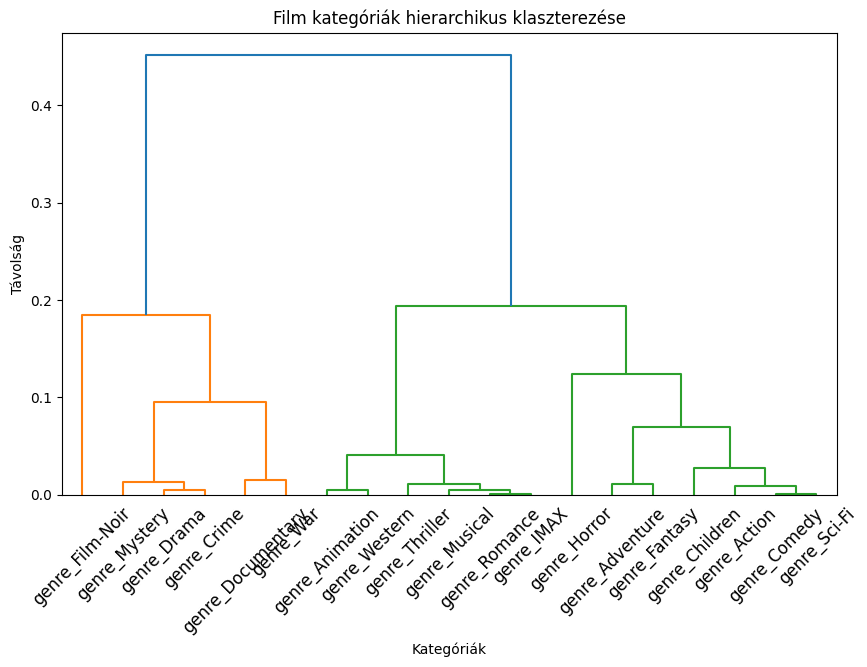

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

genre_columns = [col for col in user_genre_pref.columns if col.startswith('genre_')]

genre_similarity = user_genre_pref[genre_columns].mean()

Z = linkage(genre_similarity.values.reshape(-1, 1), method='complete', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=genre_columns, leaf_rotation=45)
plt.title('Film kategóriák hierarchikus klaszterezése')
plt.xlabel('Kategóriák')
plt.ylabel('Távolság')
plt.show()


In [17]:
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')

genre_cluster_mapping = pd.DataFrame({
    'genre': genre_columns,
    'cluster': clusters
}).sort_values('cluster')

print(genre_cluster_mapping)


                genre  cluster
6         genre_Drama        1
14  genre_Documentary        1
11      genre_Mystery        1
8         genre_Crime        1
15          genre_War        1
18    genre_Film-Noir        1
5       genre_Romance        2
1     genre_Animation        2
9      genre_Thriller        2
17      genre_Western        2
16      genre_Musical        2
13         genre_IMAX        2
0     genre_Adventure        3
7        genre_Action        3
2      genre_Children        3
3        genre_Comedy        3
12       genre_Sci-Fi        3
10       genre_Horror        3
4       genre_Fantasy        3


In [18]:
doc_cluster = genre_cluster_mapping[genre_cluster_mapping['genre'] == 'genre_Documentary']['cluster'].values[0]

similar_genres = genre_cluster_mapping[genre_cluster_mapping['cluster'] == doc_cluster]['genre'].tolist()
similar_genres.remove('genre_Documentary')  
print(f"A Documentary kategória kedvelőinek hasonló kategóriák: {similar_genres}")


A Documentary kategória kedvelőinek hasonló kategóriák: ['genre_Drama', 'genre_Mystery', 'genre_Crime', 'genre_War', 'genre_Film-Noir']


In [19]:
user_id = 123759

user_rated_movies = merged_df[merged_df['userId'] == user_id]
user_rated_genres = user_rated_movies[genre_columns].sum()

unseen_genres = [genre for genre in genre_columns if user_rated_genres[genre] == 0]

if unseen_genres:
    suggested_genre = similar_genres[0]
    print(f"A felhasználó számára ajánlott kategória: {suggested_genre}")
else:
    print("A felhasználó minden kategóriából látott már filmet.")


A felhasználó számára ajánlott kategória: genre_Drama
